# Algorytmy klasyfikacji

**Zadanie 1:**  
Korzystając z plików *winequality-red.csv* oraz *winequality-white.csv* stwórz modele regresji logistycznej:

1. Bazując na kolumnach `fixed acidity`, `citric acid`, `density` oraz `pH` stwórz model regresji logistycznej, który będzie przewidywał, czy wino zostanie przydzielone do kategorii niskoalkoholowe lub wysokoalkoholowe, przy założeniu że:
   - `alcohol >= 10` - wino wysokoalkoholowe,
   - `alcohol < 10` - wino niskoalkoholowe.
   W tym celu przygotuj zmienną docelową na podstawie kolumny `alcohol`.
2. Dla obu zbiorów danych przygotuj kompletny proces uczenia modelu obejmujący:
   - wybór cech wejściowych i etykiet,
   - podział danych na zbiór treningowy i testowy,
   - trenowanie modelu regresji logistycznej,
   - ocenę jakości klasyfikacji na zbiorze testowym.
   Następnie porównaj uzyskane wyniki i wskaż, dla którego zbioru danych model osiąga większą dokładność.
3. Wykorzystaj metodę RFE z biblioteki `scikit-learn` w celu selekcji cech:
   - wyznacz 3 najlepsze predyktory dla modelu regresji logistycznej,
   - sprawdź, czy predyktory wykorzystane w punkcie 1 znajdują się wśród wybranych cech,
   - krótko skomentuj otrzymane wyniki.
   [Dokumentacja RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

# --- Zadanie 1.1/1.2 ---

def process_wine_data(filename):
    # Wczytanie danych (separator to ;)
    df = pd.read_csv(filename, sep=';')
    
    # 1. Przygotowanie zmiennej docelowej (alkohol)
    # 1 dla alcohol >= 10 (wysokoalkoholowe), 0 dla < 10 (niskoalkoholowe)
    df['target'] = (df['alcohol'] >= 10).astype(int)
    
    # Wybór cech
    features = ['fixed acidity', 'citric acid', 'density', 'pH']
    X = df[features]
    y = df['target']
    
    # 2. Podział danych i trenowanie
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Ocena
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return model, X_train, y_train, acc, df

# Analiza dla wina czerwonego
print("--- Wino czerwone ---")
model_red, X_train_red, y_train_red, acc_red, df_red = process_wine_data('winequality-red.csv')
print(f"Dokładność: {acc_red:.4f}")

# Analiza dla wina białego
print("\n--- Wino białe ---")
model_white, X_train_white, y_train_white, acc_white, df_white = process_wine_data('winequality-white.csv')
print(f"Dokładność: {acc_white:.4f}")

# Porównanie
print("\n--- Wniosek ---")
if acc_red > acc_white:
    print("Model dla wina czerwonego osiąga wyższą dokładność.")
else:
    print("Model dla wina białego osiąga wyższą dokładność.")


# --- Zadanie 1.3 ---
print("\n--- Selekcja cech RFE (na przykładzie wina czerwonego) ---")

# Przygotowanie wszystkich cech (z wyłączeniem alcohol, quality i target)
all_features = df_red.drop(columns=['alcohol', 'quality', 'target'])
X_all = all_features
y_all = df_red['target']

# Wybór 3 najlepszych cech
model_rfe = LogisticRegression(max_iter=1000, random_state=42)
selector = RFE(model_rfe, n_features_to_select=3)
selector = selector.fit(X_all, y_all)

selected_features = X_all.columns[selector.support_]
print(f"3 najlepsze predyktory wg RFE: {list(selected_features)}")

# Sprawdzenie czy pierwotne cechy (fixed acidity, citric acid, density, pH) są w wybranych
initial_features = ['fixed acidity', 'citric acid', 'density', 'pH']
overlap = [f for f in initial_features if f in selected_features]

print(f"Cechy z punktu 1, które znalazły się w najlepszej trójce: {overlap}")
if not overlap:
    print("Żadna z cech z punktu 1 nie znalazła się w TOP 3 wybranych przez RFE.")
else:
    print("Cześć cech z punktu 1 pokrywa się z sugestiami RFE.")

--- Wino czerwone ---
Dokładność: 0.6562

--- Wino białe ---
Dokładność: 0.6279

--- Wniosek ---
Model dla wina czerwonego osiąga wyższą dokładność.

--- Selekcja cech RFE (na przykładzie wina czerwonego) ---
3 najlepsze predyktory wg RFE: ['citric acid', 'chlorides', 'pH']
Cechy z punktu 1, które znalazły się w najlepszej trójce: ['citric acid', 'pH']
Cześć cech z punktu 1 pokrywa się z sugestiami RFE.


**Zadanie 2**  
Korzystając z pliku *SMSSpamCollection.csv* i wykorzystując naiwny klasyfikator Bayes’a, stwórz model, który będzie klasyfikował wiadomości SMS jako `ham` lub `spam`. Wykonaj poszczególne analizy:

1. Odczytaj dane z pliku (separator: `\t`) i nazwij odpowiednio kolumny: pierwsza `label`, druga `message`. Sprawdź czy występują puste rekordy (np. puste wartości lub puste wiadomości), jeżeli tak to usuń je z danych. Następnie zamień dane z kolumny `label` na wartości numeryczne `ham : 0`, `spam : 1` i sprawdź liczebność klas (ile jest `ham`, ile `spam`).
2. Dodaj kolumny:
   - `message_length` - długość wiadomości (liczba znaków),
   - `uppercase_count` - liczba wielkich liter w wiadomości,
   - `digit_count` - liczba cyfr w wiadomości.
   Następnie:
   - przygotuj zbiór cech i etykiet,
   - wykonaj podział na zbiór treningowy i testowy,
   - wytrenuj klasyfikator Bayes’a,
   - sprawdź jakość modelu obliczając: dokładność i macierz pomyłek,
   - macierz pomyłek przedstaw na wykresie.
3. Sprawdź czy dodanie kolumn `contains_FREE`, `contains_WIN`, `contains_CALL_NOW` będzie miało wpływ na dokładność modelu Bayes’a. Kolumny mają zawierać informację (0/1), czy w wiadomości występuje fraza:
   - `FREE`,
   - `WIN`,
   - `CALL NOW`.
   Uwzględnij różne warianty zapisu (np. wielkość liter) i sprawdź wyniki modelu po dodaniu tych cech. Przedstaw jakość modelu obliczając: dokładność i macierz pomyłek, macierz przedstaw na wykresie.
4. Zapoznaj się z metodą `CountVectorizer` z biblioteki `sklearn.feature_extraction.text` i oblicz wektory dla kolumny `message`. Następnie:
   - połącz (jeżeli chcesz) wektory tekstu z cechami dodatkowymi z punktu 2 lub 3 (albo wykonaj warianty porównawcze),
   - wytrenuj model Bayes’a na tak przygotowanych danych,
   - przedstaw jakość modelu obliczając: dokładność i macierz pomyłek, macierz przedstaw na wykresie.
   [Dokumentacja CountVectorizer](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)


--- Zadanie 2.1: Wczytanie danych ---
Liczba usuniętych rekordów: 0
Liczebność klas:
label
ham     4825
spam     747
Name: count, dtype: int64

--- Zadanie 2.2: Podstawowe cechy ---
Dokładność (basic features): 0.9725


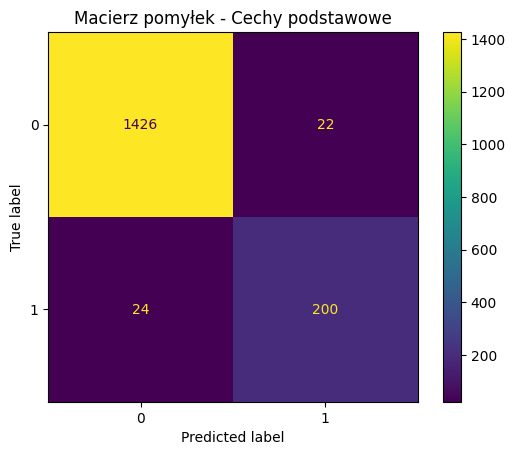


--- Zadanie 2.3: Dodatkowe słowa kluczowe ---
Dokładność (z keywords): 0.9599


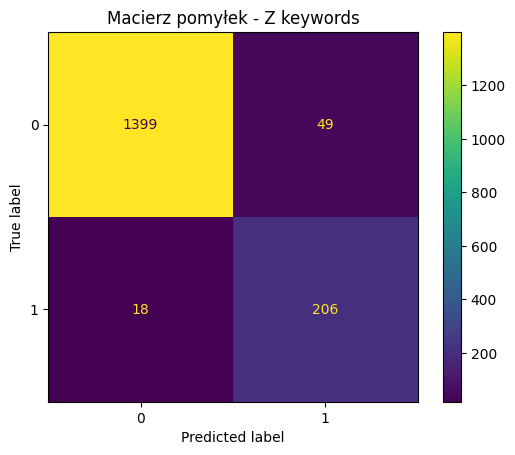


--- Zadanie 2.4: CountVectorizer ---
Dokładność (CountVectorizer): 0.9850


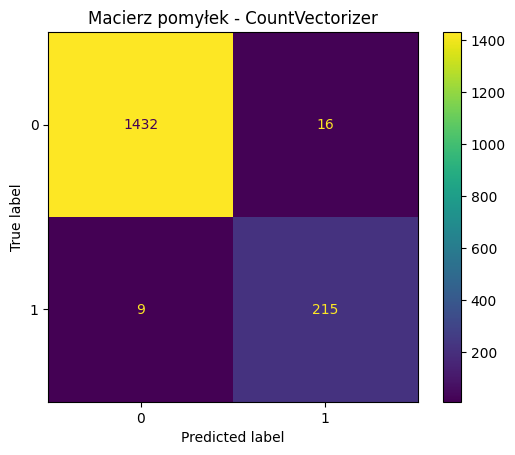

In [2]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# --- Zadanie 2.1 ---
print("--- Zadanie 2.1: Wczytanie danych ---")
# Wczytanie danych (separator to tabulacja, brak nagłówka)
df_sms = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'message'])

# Sprawdzenie i usunięcie pustych
initial_len = len(df_sms)
df_sms.dropna(inplace=True)
# Sprawdzenie pustych stringów
df_sms = df_sms[df_sms['message'].str.strip().astype(bool)]
print(f"Liczba usuniętych rekordów: {initial_len - len(df_sms)}")

# Mapowanie etykiet
df_sms['label_num'] = df_sms['label'].map({'ham': 0, 'spam': 1})

# Liczebność klas
counts = df_sms['label'].value_counts()
print("Liczebność klas:")
print(counts)

# --- Zadanie 2.2 ---
print("\n--- Zadanie 2.2: Podstawowe cechy ---")
df_sms['message_length'] = df_sms['message'].apply(len)
df_sms['uppercase_count'] = df_sms['message'].apply(lambda x: sum(1 for c in x if c.isupper()))
df_sms['digit_count'] = df_sms['message'].apply(lambda x: sum(1 for c in x if c.isdigit()))

features_basic = ['message_length', 'uppercase_count', 'digit_count']
X_basic = df_sms[features_basic]
y = df_sms['label_num']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_basic, y, test_size=0.3, random_state=42)

nb_basic = GaussianNB()
nb_basic.fit(X_train_b, y_train_b)
y_pred_b = nb_basic.predict(X_test_b)
acc_b = accuracy_score(y_test_b, y_pred_b)
print(f"Dokładność (basic features): {acc_b:.4f}")

cm_b = confusion_matrix(y_test_b, y_pred_b)
ConfusionMatrixDisplay(cm_b).plot()
plt.title("Macierz pomyłek - Cechy podstawowe")
plt.show()

# --- Zadanie 2.3 ---
print("\n--- Zadanie 2.3: Dodatkowe słowa kluczowe ---")
keywords = ['FREE', 'WIN', 'CALL NOW']
for kw in keywords:
    # Wyszukiwanie frazy (case insensitive)
    col = f'contains_{kw.replace(" ", "_")}'
    df_sms[col] = df_sms['message'].str.contains(kw, case=False, regex=False).astype(int)

features_keywords = features_basic + [f'contains_{kw.replace(" ", "_")}' for kw in keywords]
X_kw = df_sms[features_keywords]

X_train_kw, X_test_kw, y_train_kw, y_test_kw = train_test_split(X_kw, y, test_size=0.3, random_state=42)

nb_kw = GaussianNB()
nb_kw.fit(X_train_kw, y_train_kw)
y_pred_kw = nb_kw.predict(X_test_kw)
acc_kw = accuracy_score(y_test_kw, y_pred_kw)
print(f"Dokładność (z keywords): {acc_kw:.4f}")

cm_kw = confusion_matrix(y_test_kw, y_pred_kw)
ConfusionMatrixDisplay(cm_kw).plot()
plt.title("Macierz pomyłek - Z keywords")
plt.show()

# --- Zadanie 2.4 ---
print("\n--- Zadanie 2.4: CountVectorizer ---")
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(df_sms['message'])

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vec, y, test_size=0.3, random_state=42)

nb_vec = MultinomialNB()
nb_vec.fit(X_train_v, y_train_v)
y_pred_v = nb_vec.predict(X_test_v)
acc_v = accuracy_score(y_test_v, y_pred_v)
print(f"Dokładność (CountVectorizer): {acc_v:.4f}")

cm_v = confusion_matrix(y_test_v, y_pred_v)
ConfusionMatrixDisplay(cm_v).plot()
plt.title("Macierz pomyłek - CountVectorizer")
plt.show()

**Zadanie 3:**  
Plik *loan_approval_dataset.csv* zawiera informacje o kredytobiorcach. Stwórz model klasyfikacyjny K-NN, którego zadaniem będzie przewidywanie decyzji o akceptacji kredytu na podstawie danych.
1. Odczytaj dane z pliku *loan_approval_dataset.csv*. Sprawdź, czy w zbiorze danych występują puste rekordy – jeżeli tak, uzupełnij brakujące wartości w kolumnach numerycznych wartością mediany dla danej kolumny. Następnie zamień zmienne kategoryczne na postać numeryczną w sposób umożliwiający ich wykorzystanie w modelu K-NN.
2. Zaimplementuj model K-NN z wykorzystaniem miary odległości `euclidean` oraz parametru $k = 5$. Sprawdź jakość modelu poprzez obliczenie dokładności oraz macierzy pomyłek. Macierz pomyłek przedstaw na wykresie.
3. Zmodyfikuj model, stosując różne miary odległości, np. `minkowski`, `manhattan`, `euclidean`, oraz różne wartości parametru $k \in \{7, 9, 11\}$. Dla każdej konfiguracji sprawdź jakość modelu i porównaj uzyskane wyniki.
4. Zakładając miarę `euclidean` oraz $k = 5$, sprawdź jaki wpływ na jakość modelu będzie miało usunięcie kolumn `no_of_dependents`, `education`, `self_employed`. Sprawdź jakość modelu poprzez obliczenie dokładności oraz macierzy pomyłek. Macierz pomyłek przedstaw na wykresie.

--- Zadanie 3.1: Przygotowanie danych Loan Approval ---

--- Zadanie 3.2: K-NN (k=5, euclidean) ---
Dokładność: 0.5839


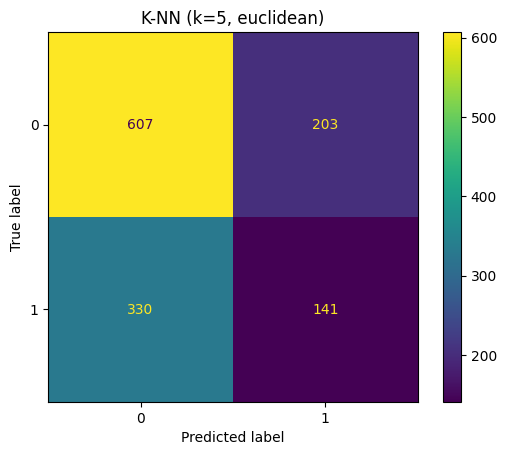


--- Zadanie 3.3: Warianty K-NN ---
      metric   k  accuracy
5  manhattan  11  0.599532
4  manhattan   9  0.595628
8  euclidean  11  0.586261
2  minkowski  11  0.586261
7  euclidean   9  0.583919
1  minkowski   9  0.583919
3  manhattan   7  0.582358
0  minkowski   7  0.581577
6  euclidean   7  0.581577

--- Zadanie 3.4: Redukcja cech ---
Dokładność (po usunięciu kolumn): 0.5839


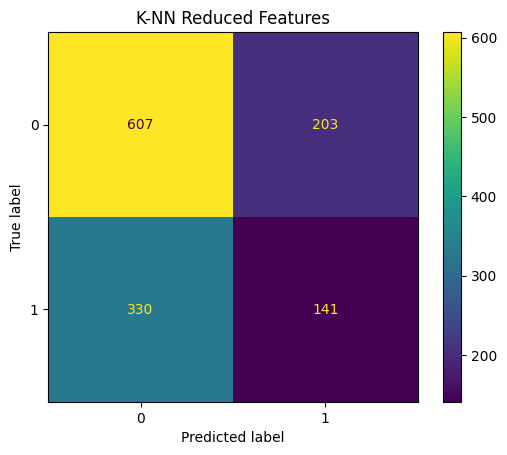

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# --- Zadanie 3.1 ---
print("--- Zadanie 3.1: Przygotowanie danych Loan Approval ---")
df_loan = pd.read_csv('loan_approval_dataset.csv')
df_loan.columns = df_loan.columns.str.strip()

# Uzupełnianie braków medianą (dla kolumn numerycznych)
num_cols = df_loan.select_dtypes(include=np.number).columns
for col in num_cols:
    if df_loan[col].isnull().any():
        df_loan[col] = df_loan[col].fillna(df_loan[col].median())

# Kodowanie zmiennych kategorycznych
le_dict = {}
cat_cols = df_loan.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df_loan[col] = le.fit_transform(df_loan[col].astype(str))
    le_dict[col] = le

# Przygotowanie X i y
# 'loan_status' to zmienna decyzyjna
if 'loan_id' in df_loan.columns:
    X_loan = df_loan.drop(columns=['loan_status', 'loan_id'])
else:
    X_loan = df_loan.drop(columns=['loan_status'])
y_loan = df_loan['loan_status']

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_loan, y_loan, test_size=0.3, random_state=42)

# --- Zadanie 3.2 ---
print("\n--- Zadanie 3.2: K-NN (k=5, euclidean) ---")
knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn5.fit(X_train_l, y_train_l)
y_pred_l = knn5.predict(X_test_l)
acc_l = accuracy_score(y_test_l, y_pred_l)
print(f"Dokładność: {acc_l:.4f}")

ConfusionMatrixDisplay(confusion_matrix(y_test_l, y_pred_l)).plot()
plt.title("K-NN (k=5, euclidean)")
plt.show()

# --- Zadanie 3.3 ---
print("\n--- Zadanie 3.3: Warianty K-NN ---")
metrics = ['minkowski', 'manhattan', 'euclidean']
k_values = [7, 9, 11]

results = []
for m in metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(X_train_l, y_train_l)
        score = knn.score(X_test_l, y_test_l)
        results.append({'metric': m, 'k': k, 'accuracy': score})

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='accuracy', ascending=False))

# --- Zadanie 3.4 ---
print("\n--- Zadanie 3.4: Redukcja cech ---")
# Usunięcie 'no_of_dependents', 'education', 'self_employed'
cols_to_drop = ['no_of_dependents', 'education', 'self_employed']
X_reduced = X_loan.drop(columns=[c for c in cols_to_drop if c in X_loan.columns])

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y_loan, test_size=0.3, random_state=42)

knn_red = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_red.fit(X_train_r, y_train_r)
y_pred_r = knn_red.predict(X_test_r)
acc_r = accuracy_score(y_test_r, y_pred_r)
print(f"Dokładność (po usunięciu kolumn): {acc_r:.4f}")

ConfusionMatrixDisplay(confusion_matrix(y_test_r, y_pred_r)).plot()
plt.title("K-NN Reduced Features")
plt.show()

**Zadanie 4**  
Zapoznaj się z zawartością pliku *student_performance.csv* zawierającego dane dotyczące wyników studentów.
1. Odczytaj dane z pliku *student_performance.csv* i utwórz na ich podstawie ramkę danych. Zbadaj strukturę danych (np. typy zmiennych, nazwy kolumn, podstawowe statystyki), aby określić, jakie zmienne są dostępne i jakie przekształcenia będą konieczne przed budową modelu.
2. Zakoduj zmienne kategoryczne. Zmienna `Extracurricular Activities` jest zmienną kategoryczną i przyjmuje wartości `Yes` oraz `No`. Zamień ją na postać numeryczną, przypisując:
   - `1` dla wartości `Yes`,
   - `0` dla wartości `No`.
3. Przekształć zmienną docelową. Wskaźnik wyników studentów znajduje się w kolumnie `Performance Index`. Utwórz binarną zmienną wynikową `High Performance`, gdzie:
   - wartość `1` oznacza wynik równy lub wyższy od mediany kolumny `Performance Index`,
   - wartość `0` oznacza wynik niższy od mediany.
   Następnie usuń oryginalną kolumnę `Performance Index`, ponieważ nie będzie już wykorzystywana w dalszej analizie.
4. Normalizacja danych numerycznych. Znormalizuj wszystkie pozostałe zmienne wejściowe tak, aby miały średnią równą $0$ oraz odchylenie standardowe równe $1$. Możesz wykorzystać klasę `StandardScaler` z biblioteki `sklearn.preprocessing` lub inną metodę normalizacji.
5. Podziel dane na zbiór treningowy i testowy w proporcji $70\%$ do $30\%$, stosując losowy podział danych z zachowaniem proporcji klas (np. z wykorzystaniem parametru `stratify`).



<!-- **Zadanie 4**
Zapoznaj się z zawartością pliku *student_performance.csv* zawierający dane o wynikach studentów. 
1. Utwórz na jego podstawie ramkę danych. Zbadaj strukturę danych, aby zrozumieć, jakie zmienne są dostępne i jakie operacje mogą być potrzebne do ich przekształcenia.
2. Zakoduj zmienne kategoryczne:
   Zmienna `Extracurricular Activities` jest zmienną kategoryczną (z wartościami `Yes` i `No`). Zamień tę zmienną na wartości numeryczne:
    Przypisz `1` dla `Yes`.
    Przypisz `0` dla `No`.
4. Przekształć zmienną docelową:
   Wskaźnik wyników studentów znajduje się w kolumnie `Performance Index`. Twoim celem jest stworzenie binarnej zmiennej wynikowej `High Performance`, gdzie:
   Wartość `1` oznacza wynik równy lub wyższy od mediany wartości w kolumnie `Performance Index`.
   Wartość `0` oznacza wynik niższy od mediany.
   Usuń oryginalną kolumnę `Performance Index`, ponieważ nie jest już potrzebna.
5. Normalizacja danych numerycznych:
   Znormalizuj wszystkie pozostałe zmienne wejściowe, aby miały one średnią $0$ i odchylenie standardowe $1$. Możesz użyć narzędzia takiego jak `StandardScaler` w Pythonie lub dowolnej innej metody normalizacji.
6. Podział na zbiór treningowy i testowy:
   Podziel dane na zbiór treningowy ($70\%$) i testowy ($30\%$), przy użyciu losowego podziału, ale z zachowaniem proporcji klas (np. używając opcji `stratify`). -->

In [4]:
from sklearn.preprocessing import StandardScaler

# --- Zadanie 4.1 ---
print("--- Zadanie 4.1: Dane Student Performance ---")
df_stud = pd.read_csv('student_performance.csv')
print("Struktura danych:")
print(df_stud.info())
print("\nPodstawowe statystyki:")
print(df_stud.describe())

# --- Zadanie 4.2 ---
print("\n--- Zadanie 4.2: Kodowanie Extracurricular Activities ---")
df_stud['Extracurricular Activities'] = df_stud['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
print("Unikalne wartości po kodowaniu:", df_stud['Extracurricular Activities'].unique())

# --- Zadanie 4.3 ---
print("\n--- Zadanie 4.3: Zmienna docelowa High Performance ---")
median_perf = df_stud['Performance Index'].median()
print(f"Mediana Performance Index: {median_perf}")
df_stud['High Performance'] = (df_stud['Performance Index'] >= median_perf).astype(int)

# Usuwamy oryginalną kolumnę
df_stud.drop(columns=['Performance Index'], inplace=True)
print("Rozkład klasy docelowej:")
print(df_stud['High Performance'].value_counts())

# --- Zadanie 4.4 ---
print("\n--- Zadanie 4.4: Normalizacja ---")
# Normalizujemy wszystko poza zmienną docelową 'High Performance'
feature_cols = df_stud.columns.drop('High Performance')
scaler = StandardScaler()
df_stud[feature_cols] = scaler.fit_transform(df_stud[feature_cols])

print("Średnie po normalizacji (powinny być ~0):")
print(df_stud[feature_cols].mean().round(2))
print("Odchylenia standardowe po normalizacji (powinny być ~1):")
print(df_stud[feature_cols].std().round(2))

# --- Zadanie 4.5 ---
print("\n--- Zadanie 4.5: Podział na treningowy i testowy ---")
X_s = df_stud[feature_cols]
y_s = df_stud['High Performance']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_s, y_s, test_size=0.3, random_state=42, stratify=y_s
)
print(f"Rozmiar zbioru treningowego: {X_train_s.shape}")
print(f"Rozmiar zbioru testowego: {X_test_s.shape}")

--- Zadanie 4.1: Dane Student Performance ---
Struktura danych:
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  str    
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), str(1)
memory usage: 468.9 KB
None

Podstawowe statystyki:
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000       

**Zadanie 5**  
Dla danych przygotowanych w Zadaniu 4 wykonaj klasyfikację, wykorzystując poznane modele:
1. Klasyfikacja za pomocą drzewa decyzyjnego:  
   Twoim zadaniem jest użycie modelu drzewa decyzyjnego do klasyfikacji studentów na podstawie przygotowanych danych.
   - Wczytaj dane podzielone na zbiory treningowy i testowy.
   - Stwórz model drzewa decyzyjnego za pomocą biblioteki `sklearn` (`DecisionTreeClassifier` z parametrem `max_depth=5`).
   - Wytrenuj model na zbiorze treningowym.
   - Oceń model na zbiorze testowym za pomocą metryk: dokładność (accuracy), precyzja (precision) i czułość (recall).
   - Wyświetl wykres drzewa decyzyjnego używając `plot_tree` z modułu `sklearn.tree`.
2. Klasyfikacja za pomocą regresji logistycznej:  
   Twoim zadaniem jest zastosowanie regresji logistycznej do klasyfikacji studentów.
   - Zaimportuj `LogisticRegression` z `sklearn.linear_model`.
   - Stwórz model regresji logistycznej i dopasuj go do zbioru treningowego.
   - Oceń model na zbiorze testowym, obliczając:
     - dokładność (accuracy),
     - wartość AUC dla krzywej ROC,
     - wykres krzywej ROC.
3. Klasyfikacja za pomocą $k$-najbliższych sąsiadów (k-NN):  
   Twoim zadaniem jest użycie algorytmu $k$-najbliższych sąsiadów do klasyfikacji.
   - Zaimportuj `KNeighborsClassifier` z `sklearn.neighbors`.
   - Zbuduj model k-NN z wybraną wartością $k$ (np. $k=3$).
   - Wytrenuj model na zbiorze treningowym.
   - Oceń model na zbiorze testowym za pomocą dokładności (accuracy).
   - Znajdź optymalne $k$, testując różne wartości (np. z zakresu $k \in [1, 15]$).
   - Zbadaj, jak zmiana liczby sąsiadów wpływa na dokładność klasyfikacji (np. wykres accuracy w funkcji $k$).
4. Klasyfikacja za pomocą maszyny wektorów nośnych (SVM):  
   Twoim zadaniem jest wykorzystanie maszyny wektorów nośnych do klasyfikacji studentów.
   - Zaimportuj `SVC` z `sklearn.svm`.
   - Zbuduj model SVM z jądrem liniowym (`kernel='linear'`).
   - Wytrenuj model na zbiorze treningowym.
   - Oceń model na zbiorze testowym (np. accuracy oraz macierz pomyłek).
   - Spróbuj użyć innych jąder (np. `rbf`, `poly`) i porównaj uzyskane wyniki.

5. Klasyfikacja za pomocą naiwnego klasyfikatora Bayesa:  
   Twoim zadaniem jest zastosowanie klasyfikatora Bayesa w analizie danych.
   - Zaimportuj `GaussianNB` z `sklearn.naive_bayes`.
   - Zbuduj model i wytrenuj go na zbiorze treningowym.
   - Oceń model na zbiorze testowym za pomocą dokładności (accuracy).
   - Porównaj skuteczność z innymi modelami (z punktów 1–4) i wskaż, który model działa najlepiej dla tych danych.



<!-- **Zadanie 5**
Dokonaj klasyfikacji wykorzystując poznane modele:
1. Klasyfikacja za pomocą drzewa decyzyjnego:
   Twoim zadaniem jest użycie modelu drzewa decyzyjnego do klasyfikacji studentów na podstawie przygotowanych danych.
   * Wczytaj dane podzielone na zbiory treningowy i testowy.
   * Stwórz model drzewa decyzyjnego za pomocą biblioteki sklearn (`DecisionTreeClassifier` z parametrem `max_depth=5`).
   * Wytrenuj model na zbiorze treningowym.
   * Oceń model na zbiorze testowym za pomocą metryk, takich jak dokładność, precyzja i `recall`.
   * Wyświetl wykres drzewa decyzyjnego używając `plot_tree` z modułu `sklearn.tree`.
2. Klasyfikacja za pomocą regresji logistycznej
   Twoim zadaniem jest zastosowanie regresji logistycznej do klasyfikacji studentów.
   * Zaimportuj LogisticRegression z `sklearn.linear_model`.
   * Stwórz model regresji logistycznej i dopasuj go do zbioru treningowego.
   * Oceń model na zbiorze testowym, obliczając:
     - Dokładność (accuracy).
     - Wartość AUC dla krzywej ROC.
     - Wyświetl wykres ROC.
3. Klasyfikacja za pomocą $k$-najbliższych sąsiadów (k-NN)
   Twoim zadaniem jest użycie algorytmu $k$-najbliższych sąsiadów do klasyfikacji.
   * Zaimportuj `KNeighborsClassifier` z sklearn.neighbors.
   * Zbuduj model $k$-NN z odpowiednią wartością $k$ (np. $k=3$).
   * Wytrenuj model na zbiorze treningowym.
   * Oceń model za pomocą dokładności, a następnie znajdź optymalne k, testując różne wartości.
   * Zbadaj, jak zmiana liczby sąsiadów wpływa na dokładność klasyfikacji.
4. Klasyfikacja za pomocą maszyny wektorów nośnych (SVM)
   * Twoim zadaniem jest wykorzystanie maszyny wektorów nośnych do klasyfikacji studentów.
   * Zaimportuj `SVC` z `sklearn.svm`.
   * Zbuduj model SVM z jądrem liniowym (`kernel='linear'`).
   * Wytrenuj model na zbiorze treningowym.
   * Oceń model na zbiorze testowym.
   * Spróbuj użyć innych jąder (np. `rbf`, `poly`) i porównaj wyniki.
5. Klasyfikacja za pomocą naiwnego klasyfikatora Bayesa
   Twoim zadaniem jest zastosowanie klasyfikatora Bayesa w analizie danych.
   * Zaimportuj `GaussianNB` z `sklearn.naive_bayes`.
   * Zbuduj model i wytrenuj go na zbiorze treningowym.
   * Oceń model na zbiorze testowym za pomocą dokładności.
   * Porównaj skuteczność z innymi modelami.delami. wyniki.fikacji.kres ROC.zeuczenia? -->

--- Zadanie 5.1: Drzewo Decyzyjne ---
Accuracy: 0.9690
Precision: 0.9718
Recall: 0.9674


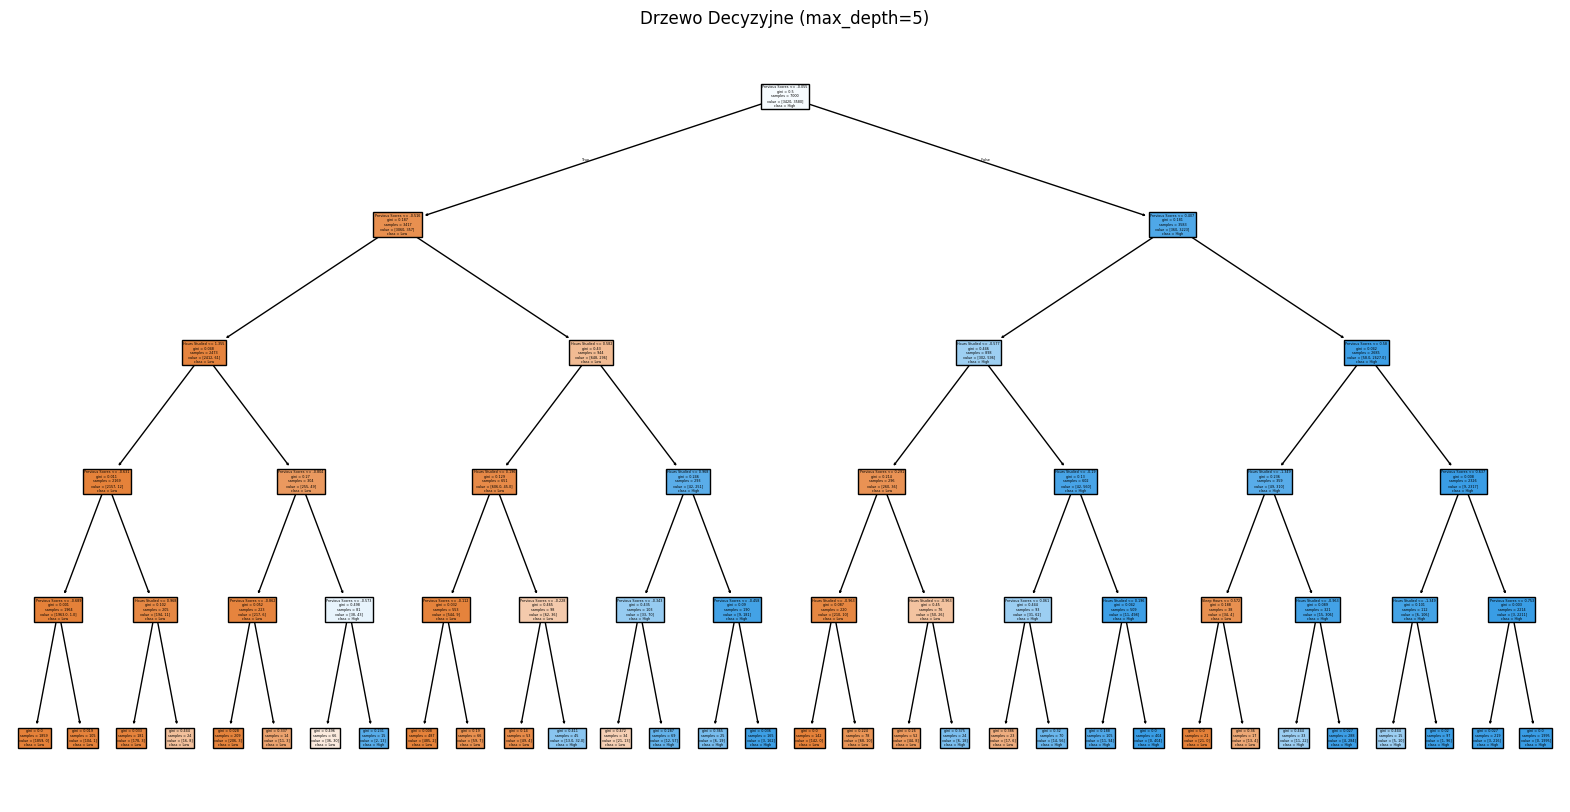


--- Zadanie 5.2: Regresja Logistyczna ---
Accuracy: 0.9733
AUC: 0.9979


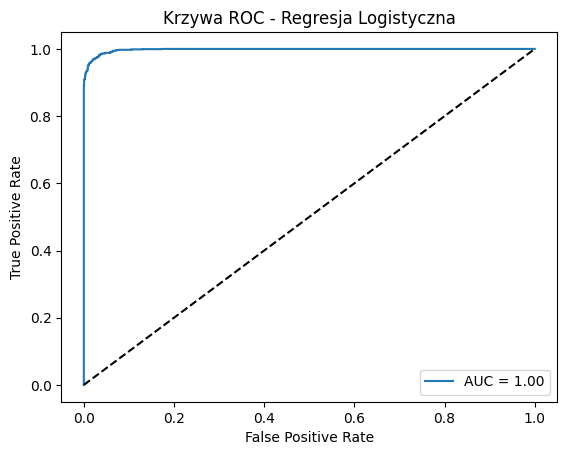


--- Zadanie 5.3: K-NN ---
Accuracy (k=3): 0.9600


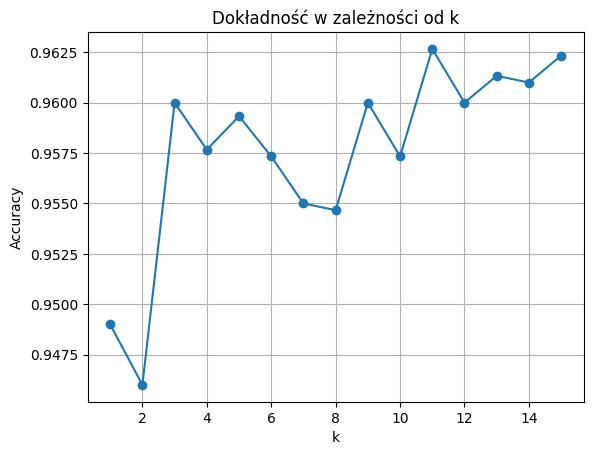

Najlepsze k: 11 z dokładnością 0.9627

--- Zadanie 5.4: SVM ---
Accuracy (kernel='linear'): 0.9727
Accuracy (kernel='rbf'): 0.9720
Accuracy (kernel='poly'): 0.9707

--- Zadanie 5.5: Naiwny Klasyfikator Bayesa ---
Accuracy (GaussianNB): 0.9213

--- Podsumowanie wyników (Student Performance) ---
Logistic Regression: 0.9733
SVM (Linear): 0.9727
Decision Tree: 0.9690
K-NN (k=3): 0.9600
Naive Bayes: 0.9213


In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.svm import SVC

# --- Zadanie 5.1 ---
print("--- Zadanie 5.1: Drzewo Decyzyjne ---")
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_s, y_train_s)
y_pred_dt = dt.predict(X_test_s)

acc_dt = accuracy_score(y_test_s, y_pred_dt)
prec_dt = precision_score(y_test_s, y_pred_dt)
rec_dt = recall_score(y_test_s, y_pred_dt)

print(f"Accuracy: {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall: {rec_dt:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=list(feature_cols), class_names=['Low', 'High'], filled=True)
plt.title("Drzewo Decyzyjne (max_depth=5)")
plt.show()

# --- Zadanie 5.2 ---
print("\n--- Zadanie 5.2: Regresja Logistyczna ---")
lr = LogisticRegression(random_state=42)
lr.fit(X_train_s, y_train_s)
y_pred_lr = lr.predict(X_test_s)
y_prob_lr = lr.predict_proba(X_test_s)[:, 1]

acc_lr = accuracy_score(y_test_s, y_pred_lr)
auc_lr = roc_auc_score(y_test_s, y_prob_lr)

print(f"Accuracy: {acc_lr:.4f}")
print(f"AUC: {auc_lr:.4f}")

fpr, tpr, _ = roc_curve(y_test_s, y_prob_lr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_lr:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Krzywa ROC - Regresja Logistyczna")
plt.legend()
plt.show()

# --- Zadanie 5.3 ---
print("\n--- Zadanie 5.3: K-NN ---")
# Trenowanie dla wybranego k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_s, y_train_s)
acc_knn3 = knn3.score(X_test_s, y_test_s)
print(f"Accuracy (k=3): {acc_knn3:.4f}")

# Szukanie optymalnego k
k_range = range(1, 16)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_s, y_train_s)
    k_scores.append(knn.score(X_test_s, y_test_s))

plt.figure()
plt.plot(k_range, k_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Dokładność w zależności od k")
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(k_scores)]
print(f"Najlepsze k: {best_k} z dokładnością {max(k_scores):.4f}")


# --- Zadanie 5.4 ---
print("\n--- Zadanie 5.4: SVM ---")
# Kernel linear
svm_lin = SVC(kernel='linear', random_state=42)
svm_lin.fit(X_train_s, y_train_s)
acc_svm_lin = svm_lin.score(X_test_s, y_test_s)
print(f"Accuracy (kernel='linear'): {acc_svm_lin:.4f}")

# Inne jądra
for kernel_type in ['rbf', 'poly']:
    svm_tmp = SVC(kernel=kernel_type, random_state=42)
    svm_tmp.fit(X_train_s, y_train_s)
    print(f"Accuracy (kernel='{kernel_type}'): {svm_tmp.score(X_test_s, y_test_s):.4f}")


# --- Zadanie 5.5 ---
print("\n--- Zadanie 5.5: Naiwny Klasyfikator Bayesa ---")
nb_gauss = GaussianNB()
nb_gauss.fit(X_train_s, y_train_s)
acc_nb = nb_gauss.score(X_test_s, y_test_s)
print(f"Accuracy (GaussianNB): {acc_nb:.4f}")

# Porównanie
print("\n--- Podsumowanie wyników (Student Performance) ---")
results = {
    'Decision Tree': acc_dt,
    'Logistic Regression': acc_lr,
    'K-NN (k=3)': acc_knn3,
    'SVM (Linear)': acc_svm_lin,
    'Naive Bayes': acc_nb
}
for name, score in sorted(results.items(), key=lambda item: item[1], reverse=True):
    print(f"{name}: {score:.4f}")